In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [241]:
num_neurons = 100

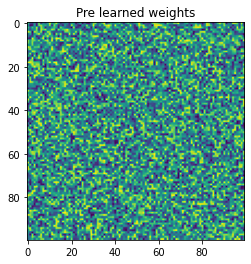

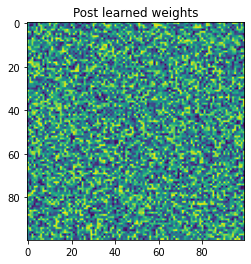

2.0446731674713952e+142


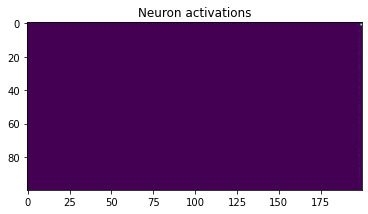

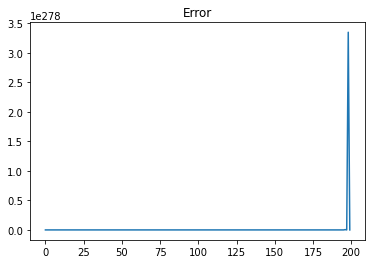

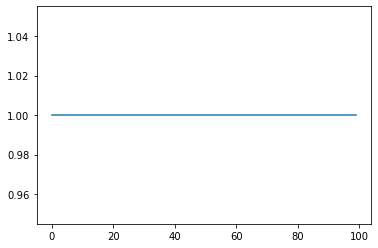

In [283]:
def sigmoid(z, deriv=False):
    o = 1 / (1 + np.exp(-z))
    if deriv:
        return o * (1 - o)
    return o


# Simulate some spiking neurons!
N = np.random.rand(num_neurons)
W = np.random.rand(num_neurons, num_neurons)

plt.title("Pre learned weights")    
plt.imshow(W)
plt.show()

Ns = []
es = []

decay = 0.9

spikes = np.zeros(num_neurons)
N[1] = 1

for t in range(200):
    last_spiked = (N >= 1)
    N = decay * N + W @ N # Activate neuron and decay over time
    N[last_spiked] = 0
    
    #N = sigmoid(Z) # How fast does the neuron react? 

    # Set target here!
    #N[0] = np.sin(i * 0.1)
    
    # How do we backpropagate the error? 
    # Increment weight for pre-synaptic neurons that contribute positively for a correct answer
    
    #W *= something
    
    # Calculate predictive coding error here
    
    #dE/dW = dE/dA dA/dz * dz/dw
    #dE/dZ * dZ/dW
    
    #dW = (N - prev_N) * (decay + spikes.T)
    #W -= 10 * dW
    
    e = np.zeros(num_neurons)
    e[0] = N[0] - np.sin(t * 0.05)
    
    
    corr = spikes[:, None] @ prev_spikes[None, :]
    
    #print(corr * W)
    
    # dE/dW = dE / dN * dN/dW 
    
    #dW = e * corr * prev_N
    #print(dW)
    
    #dW = (e @ N) * corr.T * W
    #W -= 0.1 * dW
    
    #W = W + e * corr
    
    # Plot N over time
    Ns.append(N)
    es.append(np.mean(e ** 2))

    
plt.title("Post learned weights")    
plt.imshow(W)
plt.show()

plt.title("Neuron activations")
plt.imshow(np.vstack(Ns).T)
plt.show()

plt.title("Error")
plt.plot(es)
plt.show()


output = []
for i in range(100):
    prev_N = N.copy()
    #dN = - N + W@N # Simulate getting spike from another neuron
    N = sigmoid(W @ N + decay * N)
    
    output.append(N[0])

plt.plot(output)
plt.show()